In [3]:
import torch # to create tensors to store the raw data, weights and biases 
import torch.nn as nn # to make the weights and biases learnable (part of the network)
import torch.nn.functional as F # to apply activation functions 
from torch.optim import SGD # stochastic gradient descent 

import lightning as L # to train the model 
from torch.utils.data import DataLoader, TensorDataset # to load the data 

import matplotlib.pyplot as plt # graphs 
import seaborn as sns # graphs


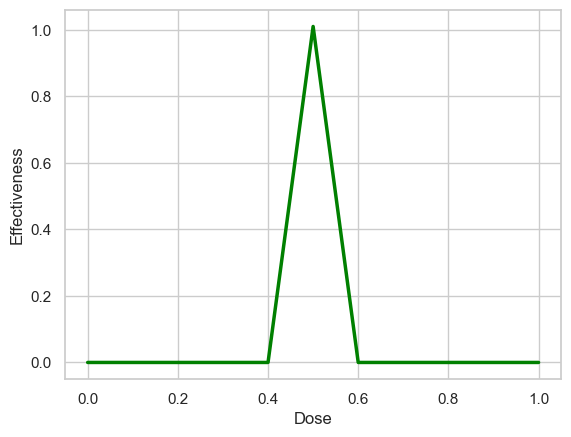

In [4]:
class BasicLightning(L.LightningModule):
    def __init__(self):
        super().__init__()
        self.w00=nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00=nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01=nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10=nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10=nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11=nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias=nn.Parameter(torch.tensor(-16.), requires_grad=False)
    
    def forward(self, input): # define the forward pass of the network
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output =  F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)
        return output

model=BasicLightning()

input_values= torch.linspace(start=0, end=1, steps=11)
output_values=model(input_values)

sns.set_theme(style="whitegrid")
sns.lineplot(x=input_values,y=output_values, color="green", linewidth=2.5)
plt.ylabel("Effectiveness")
plt.xlabel("Dose")
plt.show()

